# 3. Standard Authentication System With Traffic
## 3.1. Import Libraries and Dependencies

In [1]:
import os
import sys  
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 14})
sys.path.insert(1, '../../src/03_user_authentification')
from user_authentification import GameAuthenticator, prepare_auth_data
from intruder_authentification import (
    IntruderAuthEvaluator, 
    evaluate_authentication_system, 
    evaluate_authentication_system_with_voting
)

## 3.2. Load and Prepare Data

In [2]:
FILENAME = "TRAFFIC"

In [3]:
mov_forklift_simulator = pd.read_csv('../../data/processed/users/movement_slow_stat_cleaned.csv').fillna(0)
mov_beat_saber = pd.read_csv('../../data/processed/users/movement_fast_stat_cleaned.csv').fillna(0)
traffic_forklift_simulator = pd.read_csv('../../data/processed/users/traffic_slow_stat_cleaned.csv').fillna(0)
traffic_beat_saber = pd.read_csv('../../data/processed/users/traffic_fast_stat_cleaned.csv').fillna(0)

mov_forklift_simulator = mov_forklift_simulator[mov_forklift_simulator["ID"].isin(range(30,60))]
mov_beat_saber = mov_beat_saber[mov_beat_saber["ID"].isin(range(0,30))]
traffic_forklift_simulator =traffic_forklift_simulator[traffic_forklift_simulator["ID"].isin(range(30,60))]
traffic_beat_saber = traffic_beat_saber[traffic_beat_saber["ID"].isin(range(0,30))]

In [4]:
columns_to_drop = ['time_25%', 'time_50%', 'time_75%', 'time_max', 'time_mean', 'time_min', 'time_std']
mov_forklift_simulator.drop(columns=columns_to_drop, inplace=True)
mov_beat_saber.drop(columns=columns_to_drop, inplace=True)

## 3.3. Prepare Authentication Data

In [5]:
# Prepare data for authentication
authentication_data = prepare_auth_data(
    mov_forklift_simulator, 
    mov_beat_saber, 
    traffic_forklift_simulator, 
    traffic_beat_saber,
    include_traffic=True,
    n_intruders=120, 
)

In [6]:
# Look at the structure of sample users' datasets
print(f"\nSample Forklift Simulator User Data:")
sample_forklift_user = authentication_data['forklift_simulator']['user_ids'][0]
print(f"User ID: {sample_forklift_user}")
print(f"Data shape: {authentication_data['forklift_simulator']['datasets'][sample_forklift_user].shape}")
print(f"Class balance:")
print(authentication_data['forklift_simulator']['datasets'][sample_forklift_user]['is_genuine'].value_counts())


Sample Forklift Simulator User Data:
User ID: 30
Data shape: (180, 494)
Class balance:
is_genuine
0    120
1     60
Name: count, dtype: int64


In [7]:
print(f"\nSample Beat Saber User Data:")
sample_beat_saber_user = authentication_data['beat_saber']['user_ids'][0]
print(f"User ID: {sample_beat_saber_user}")
print(f"Data shape: {authentication_data['beat_saber']['datasets'][sample_beat_saber_user].shape}")
print(f"Class balance:")
print(authentication_data['beat_saber']['datasets'][sample_beat_saber_user]['is_genuine'].value_counts())


Sample Beat Saber User Data:
User ID: 0
Data shape: (180, 494)
Class balance:
is_genuine
0    120
1     60
Name: count, dtype: int64


## 3.4. Train and Compare Multiple Models

In [8]:
# Create game authenticator instance
authenticator = GameAuthenticator(authentication_data)

# Train multiple models
authenticator.train_multiple_models(test_size=0.2, use_time_intervals=False, compare_models=True, apply_smote = True, filename = FILENAME)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
# Get performance metrics
performance_metrics = authenticator.get_performance_summary()

# Show average performance by model type
model_performance = performance_metrics.groupby(['Game_Type', 'Model_Type']).mean().reset_index()
print("Average model performance across all users:")
display(model_performance[['Game_Type', 'Model_Type', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC']])

Average model performance across all users:


,Game_Type,Model_Type,Accuracy,Precision,Recall,F1,AUC
0,beat_saber,AdaBoost,0.985315,0.980299,0.983333,0.980939,0.996431
1,beat_saber,DecisionTree,0.957172,0.948973,0.941667,0.943568,0.954376
2,beat_saber,GaussianNB,0.950715,0.934221,0.950000,0.938790,0.960568
3,beat_saber,GradientBoosting,0.962288,0.959086,0.944444,0.949902,0.972527
4,beat_saber,KNN,0.864268,0.764773,0.977778,0.853127,0.952281
5,beat_saber,LogisticRegression,0.963208,0.940325,0.969444,0.953082,0.992936
6,beat_saber,MLP,0.961964,0.952289,0.955556,0.950704,0.989806
7,beat_saber,RandomForest,0.990394,0.992308,0.983333,0.987304,0.999476
8,beat_saber,SVM,0.949223,0.911758,0.969444,0.937446,0.990296
9,beat_saber,XGBoost,0.980033,0.982418,0.966667,0.972832,0.996071


In [10]:
# Show which models performed best for most users
best_model_counts = {}
for game_type in ['forklift_simulator', 'beat_saber']:
    best_model_counts[game_type] = {}
    for user_id, best_model in authenticator.best_models[game_type].items():
        if best_model:
            best_model_counts[game_type][best_model] = best_model_counts[game_type].get(best_model, 0) + 1
            
print("\nBest model distribution for Forklift Simulator:")
for model, count in sorted(best_model_counts['forklift_simulator'].items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {count}")

print("\nBest model distribution for Beat Saber:")
for model, count in sorted(best_model_counts['beat_saber'].items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {count}")


Best model distribution for Forklift Simulator:
RandomForest: 24
DecisionTree: 2
AdaBoost: 2
LogisticRegression: 2

Best model distribution for Beat Saber:
RandomForest: 24
AdaBoost: 3
GaussianNB: 2
GradientBoosting: 1


## 3.5. Visualize Performance Metrics

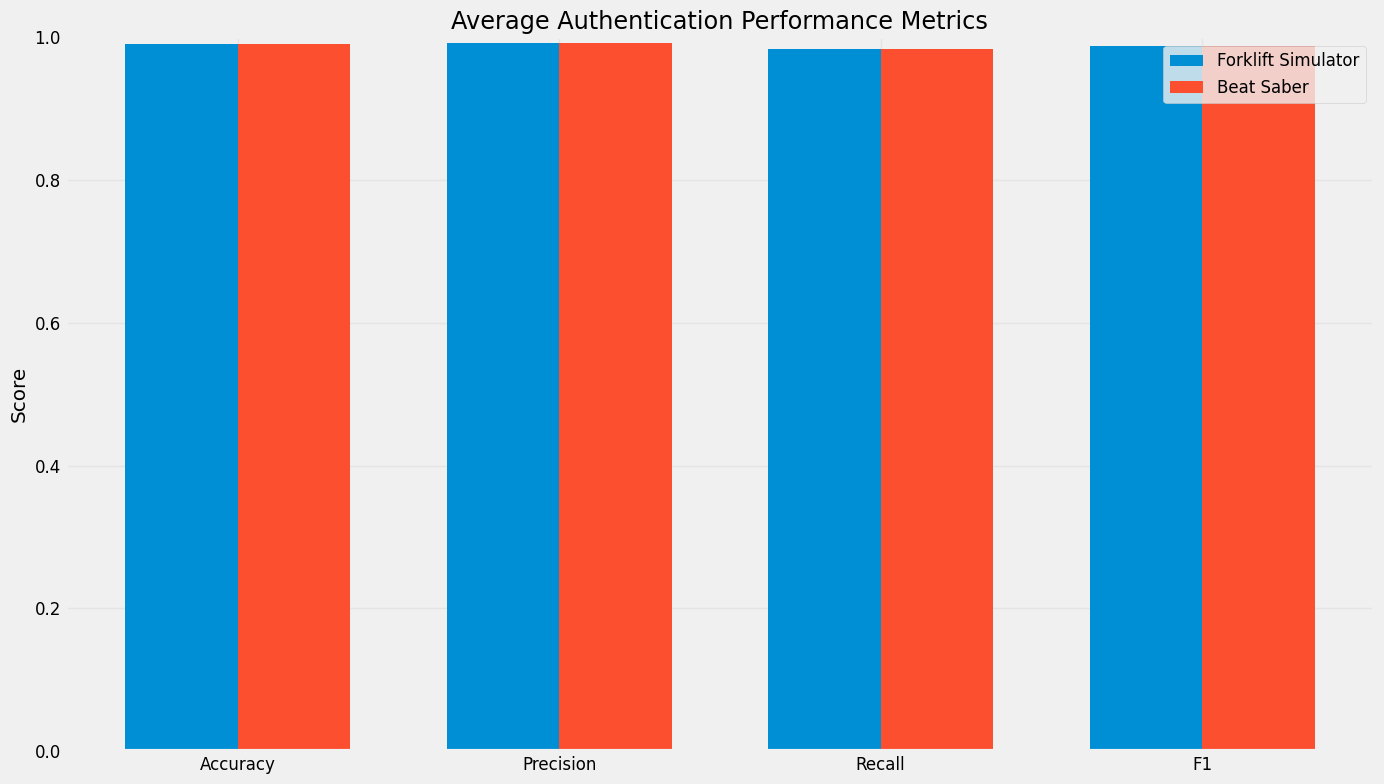

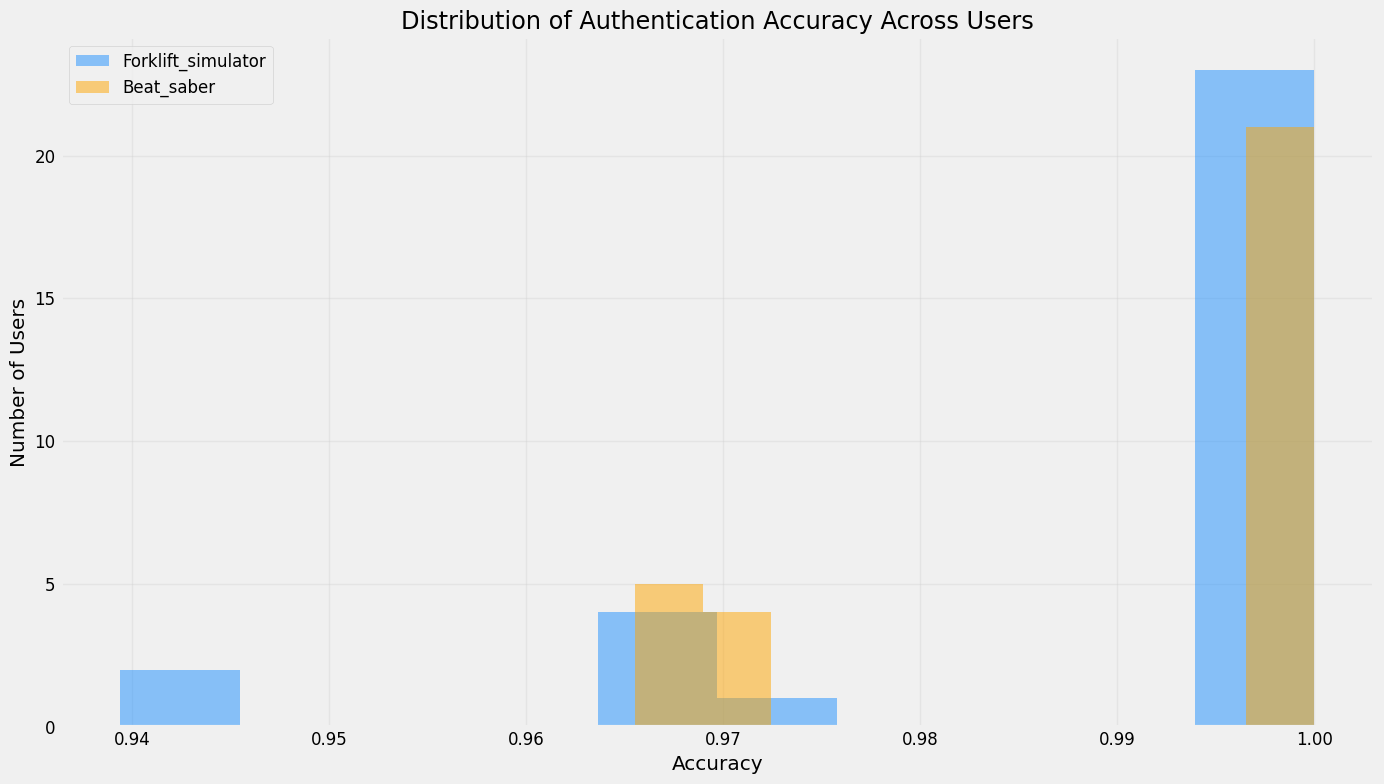

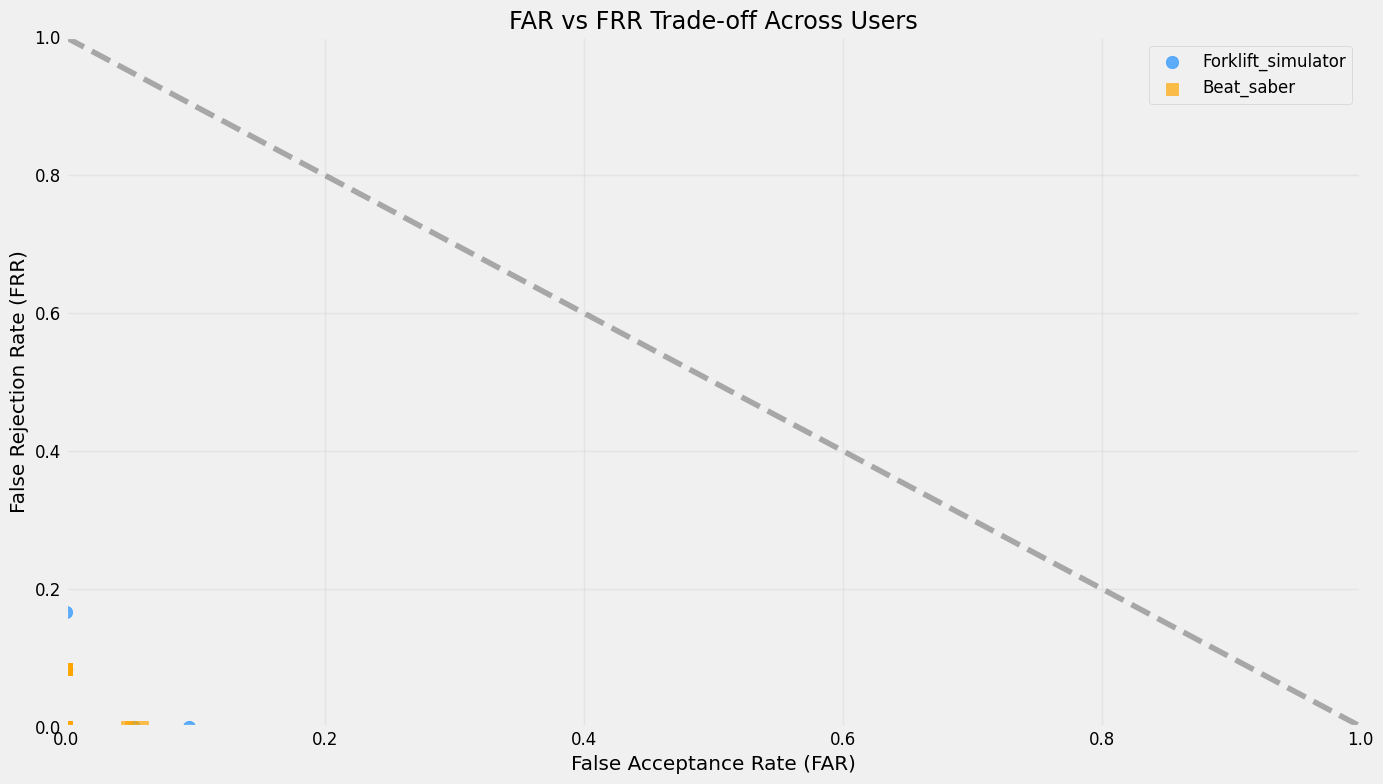

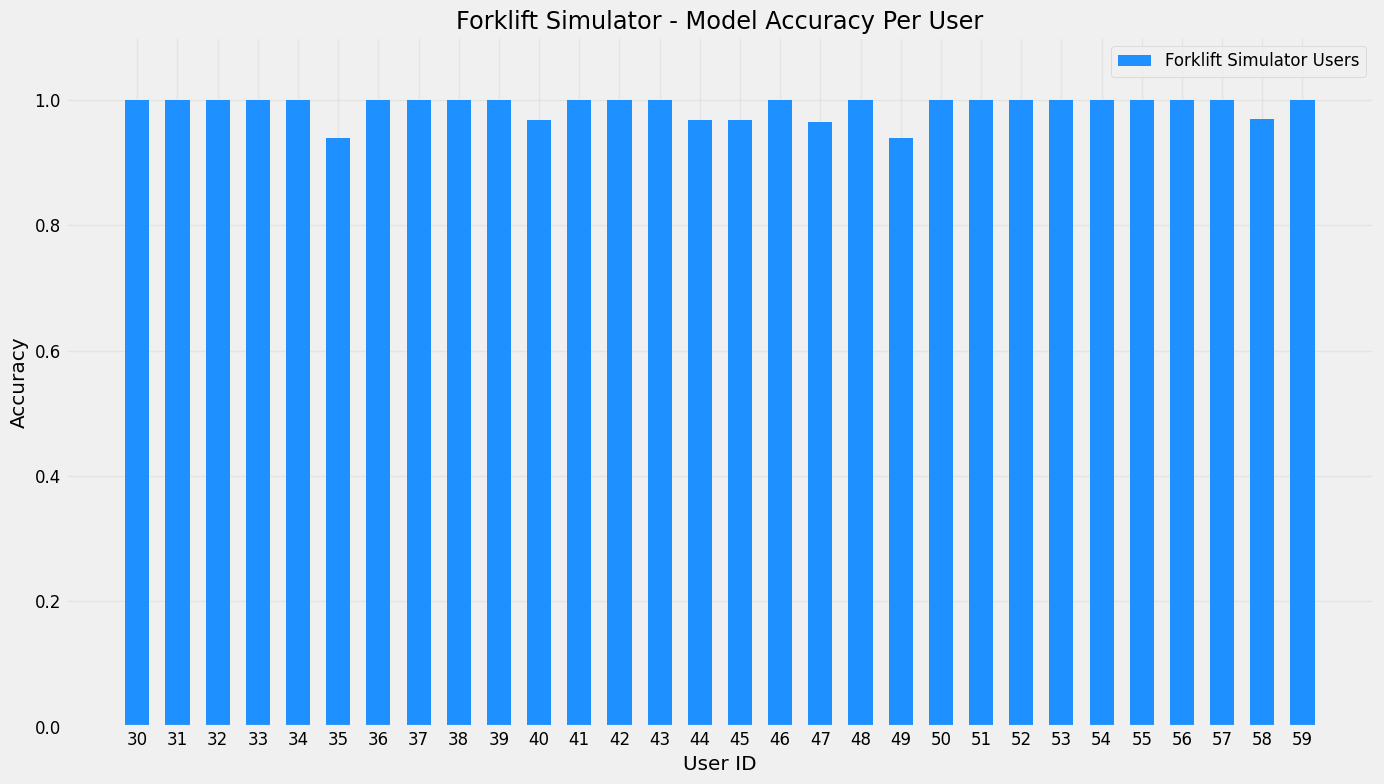

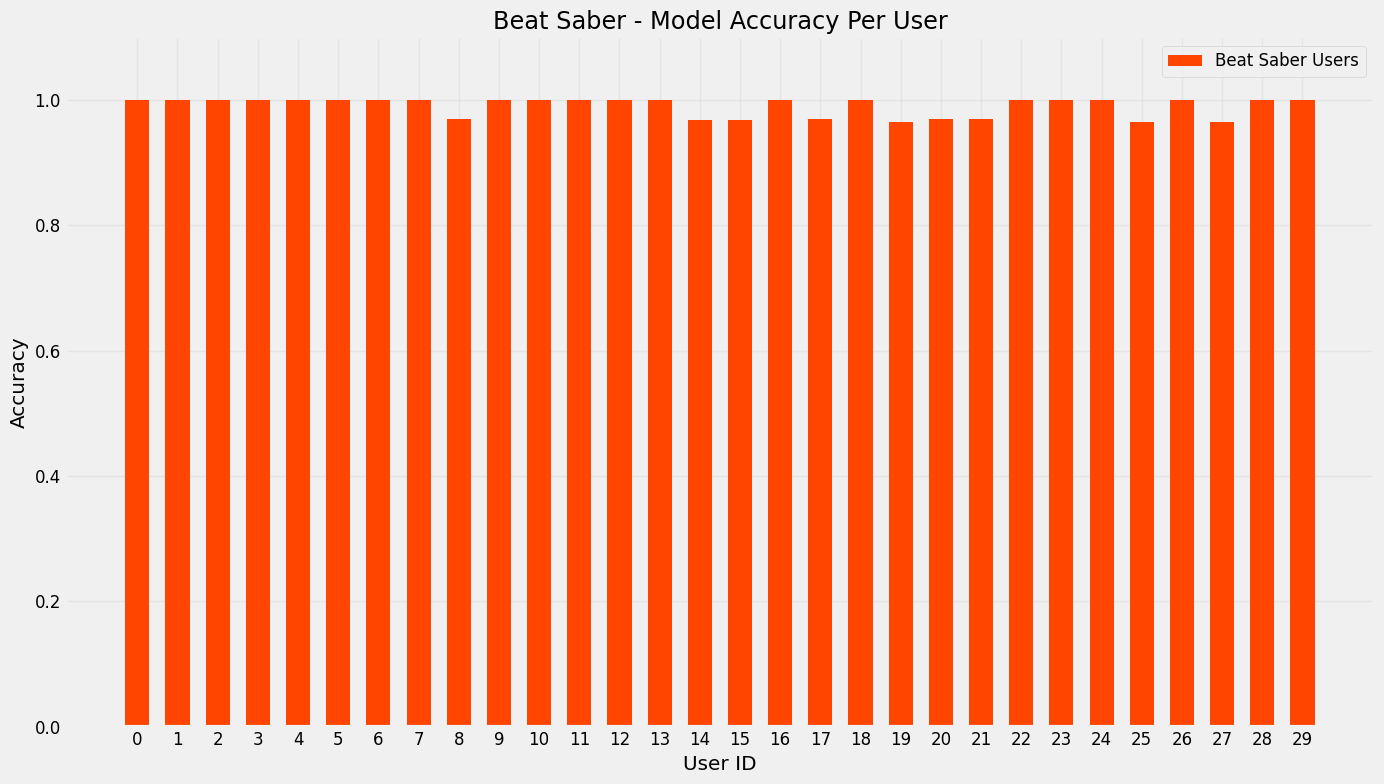

In [11]:
# Sample users for each game
sample_forklift_user = authentication_data['forklift_simulator']['user_ids'][0]
sample_beat_saber_user = authentication_data['beat_saber']['user_ids'][0]

# Visualize performance metrics using RandomForest model
authenticator.visualize_performance(
    sample_user_forklift=sample_forklift_user,
    sample_user_beat_saber=sample_beat_saber_user,
    model_name="RandomForest",
    filename = FILENAME,
)

## 3.6. Evaluate Authentication With Voting

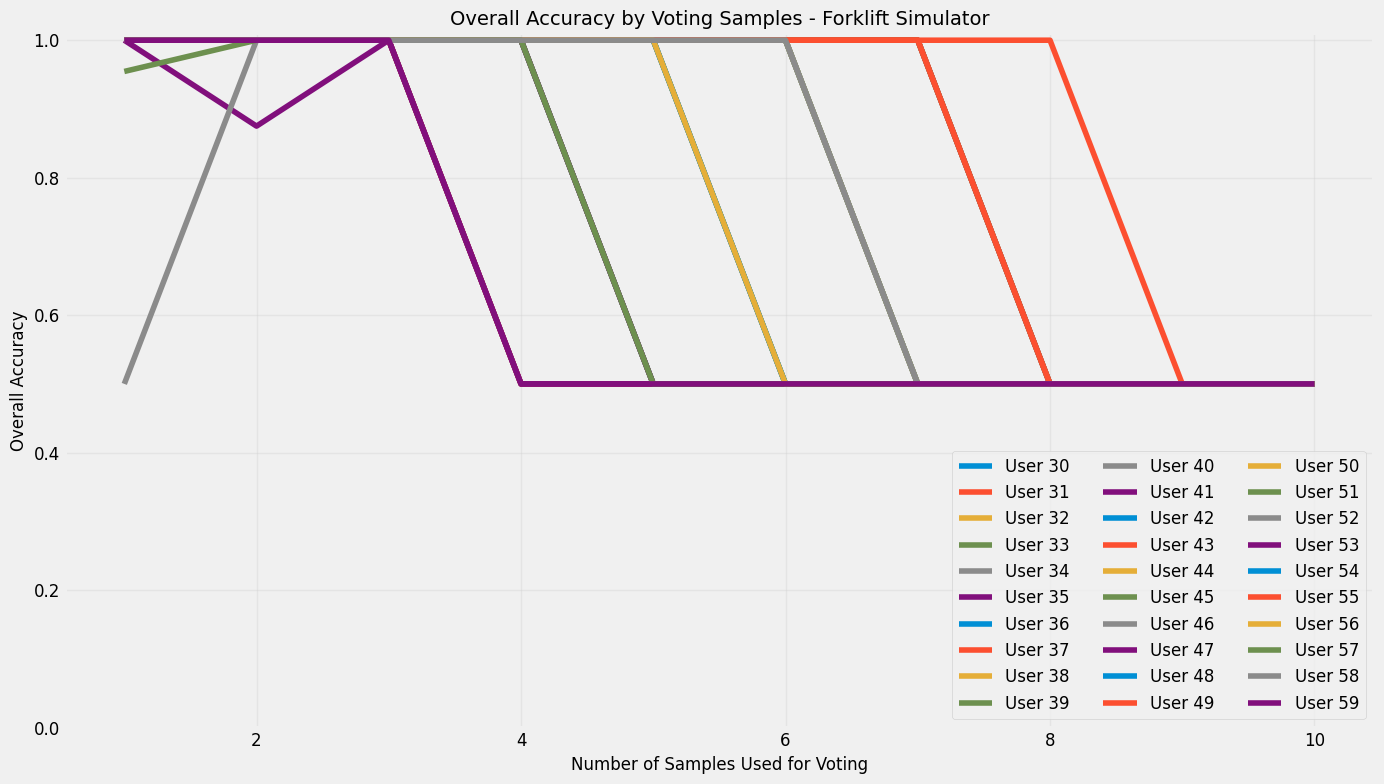

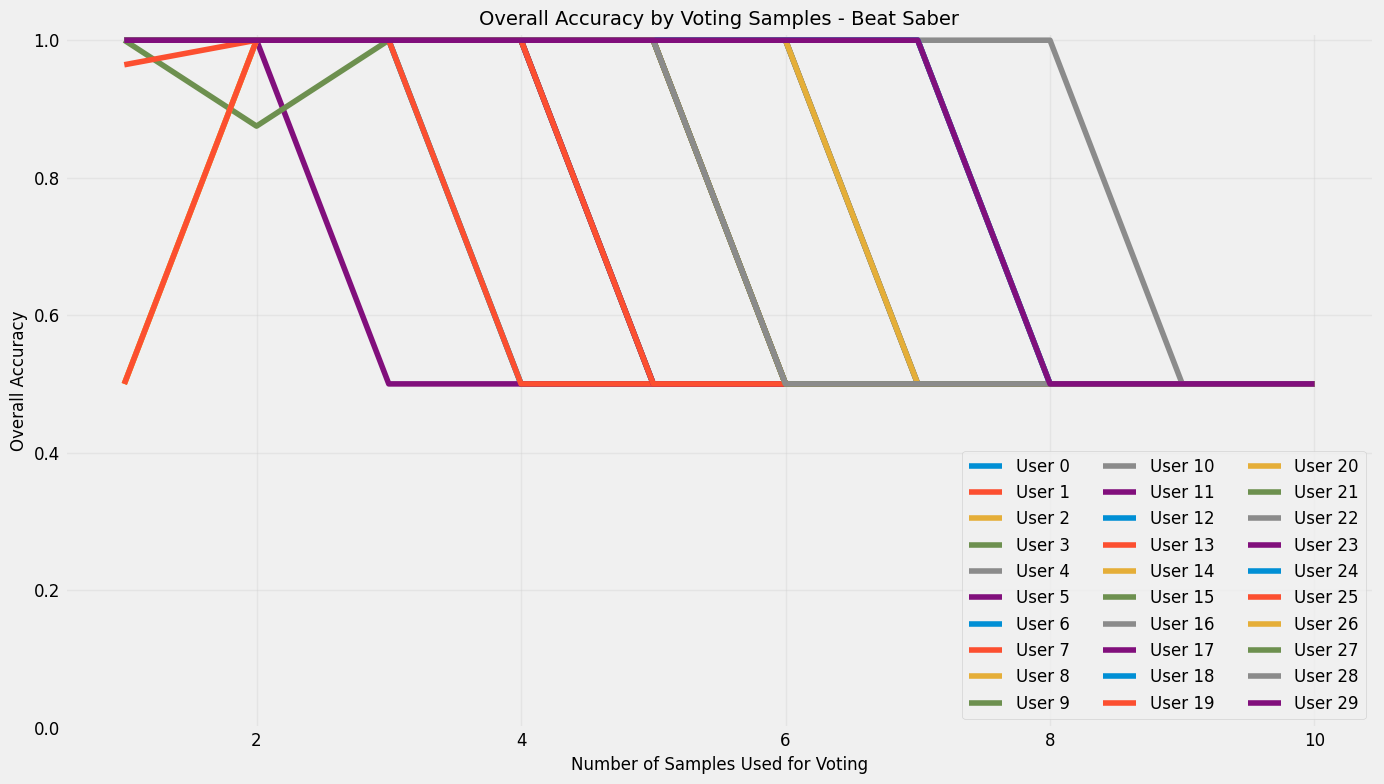

In [12]:
results = authenticator.analyze_voting_sample_effect_by_user(voting_threshold=0.5, model_name="RandomForest", filename=FILENAME)

## 3.7. Feature Importance Analysis

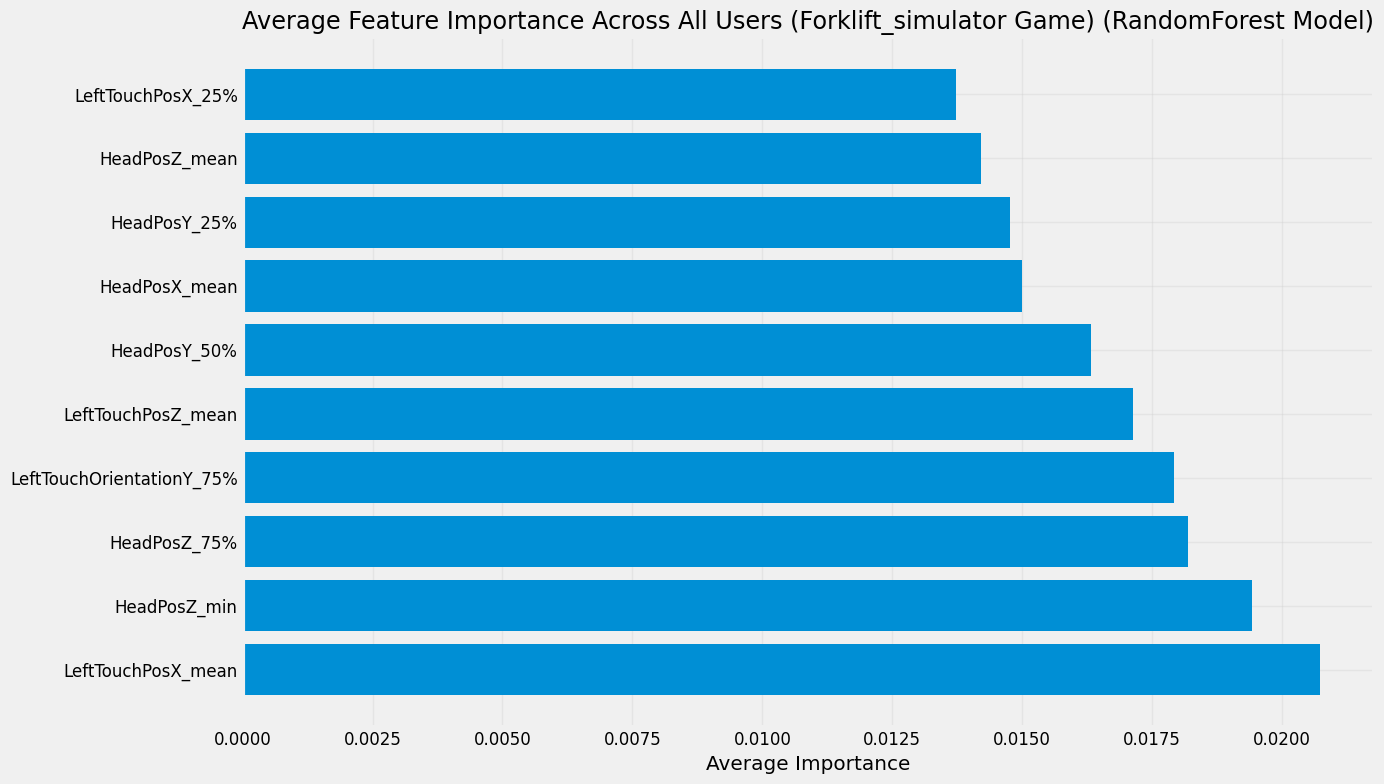

,Feature,Average_Importance
193,LeftTouchPosX_mean,0.020733
110,HeadPosZ_min,0.019430
107,HeadPosZ_75%,0.018183
177,LeftTouchOrientationY_75%,0.017924
207,LeftTouchPosZ_mean,0.017131
...,...,...
461,distance_RightTouch_to_Head_std,0.000041
36,Accel_LeftTouchPosZ_50%,0.000035
472,size_50%,0.000000
480,size_max,0.000000


In [13]:
authenticator.visualize_feature_importance(
    user_id=None, 
    game_type='forklift_simulator', 
    model_name='RandomForest',
    filename = FILENAME
)

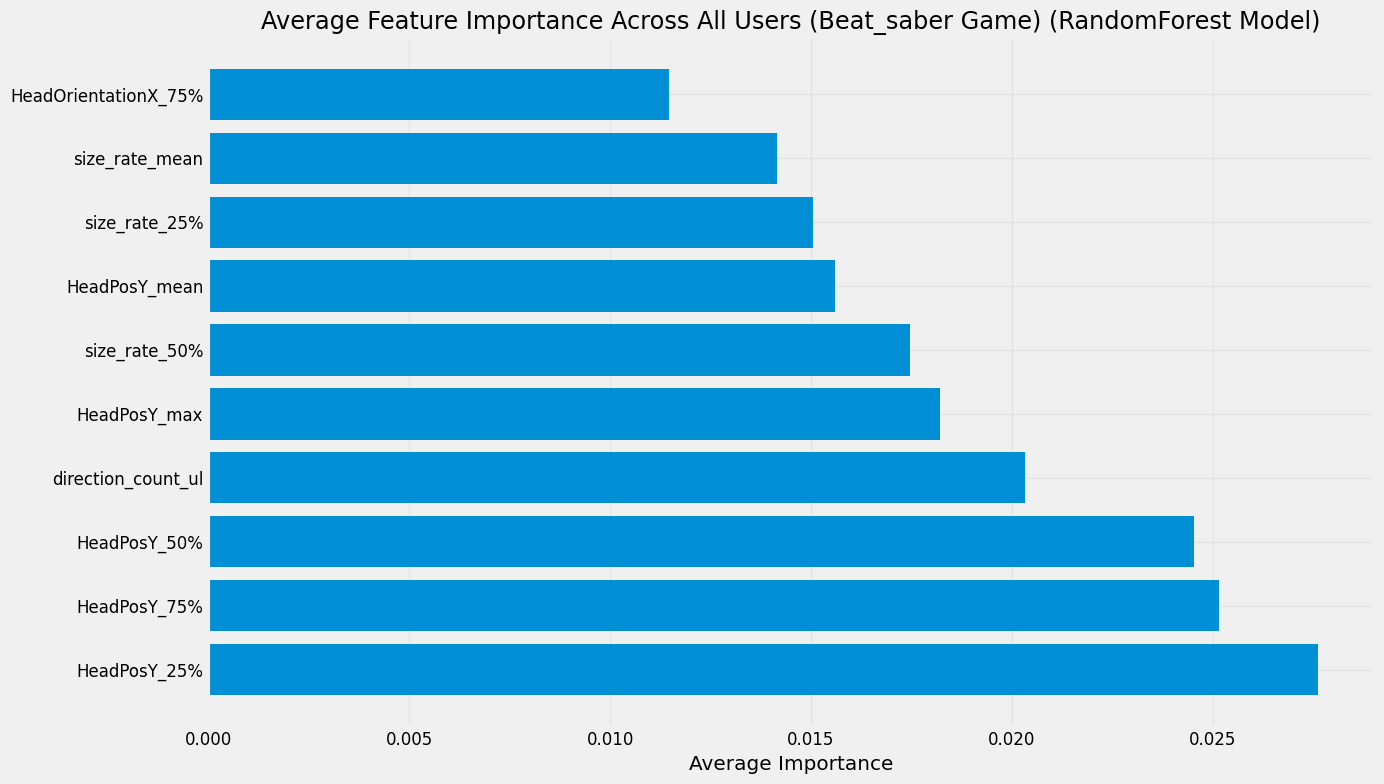

,Feature,Average_Importance
98,HeadPosY_25%,0.027628
100,HeadPosY_75%,0.025142
99,HeadPosY_50%,0.024532
463,direction_count_ul,0.020320
101,HeadPosY_max,0.018219
...,...,...
231,LeftTouch_OrientationVelocityX_25%,0.000062
30,Accel_LeftTouchPosY_75%,0.000049
158,Head_Velocity_mean,0.000043
9,Accel_HeadPosY_75%,0.000042


In [14]:
authenticator.visualize_feature_importance(
    user_id=None, 
    game_type='beat_saber',  
    model_name='RandomForest',
    filename = FILENAME
)

## 3.8. Authentication Threshold Analysis

Analyze the effect of different confidence thresholds on authentication performance.

In [15]:
forklift_threshold_results = authenticator.threshold_analysis(
    user_id=None, 
    game_type='forklift_simulator', 
    model_name='RandomForest',
    filename = FILENAME,
)


FORKLIFT SIMULATOR THRESHOLD ANALYSIS


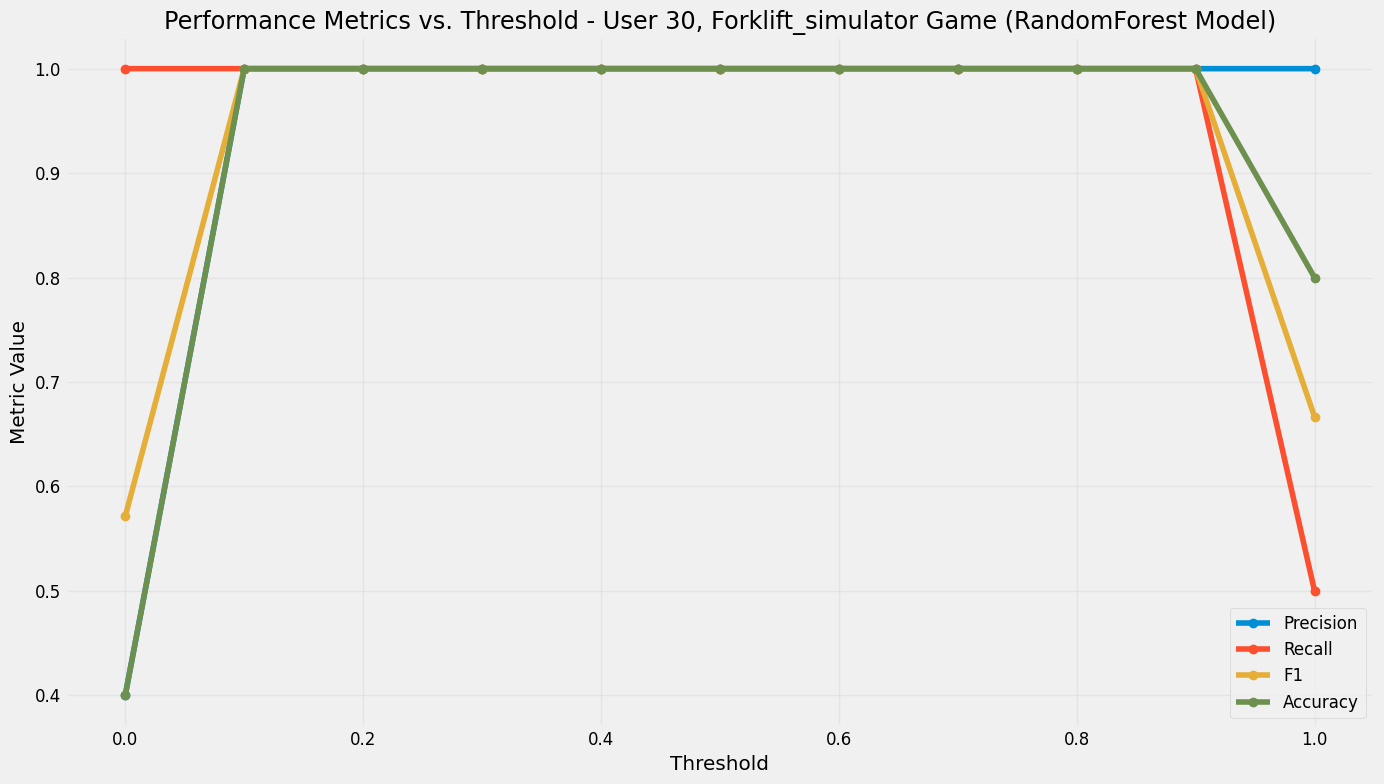

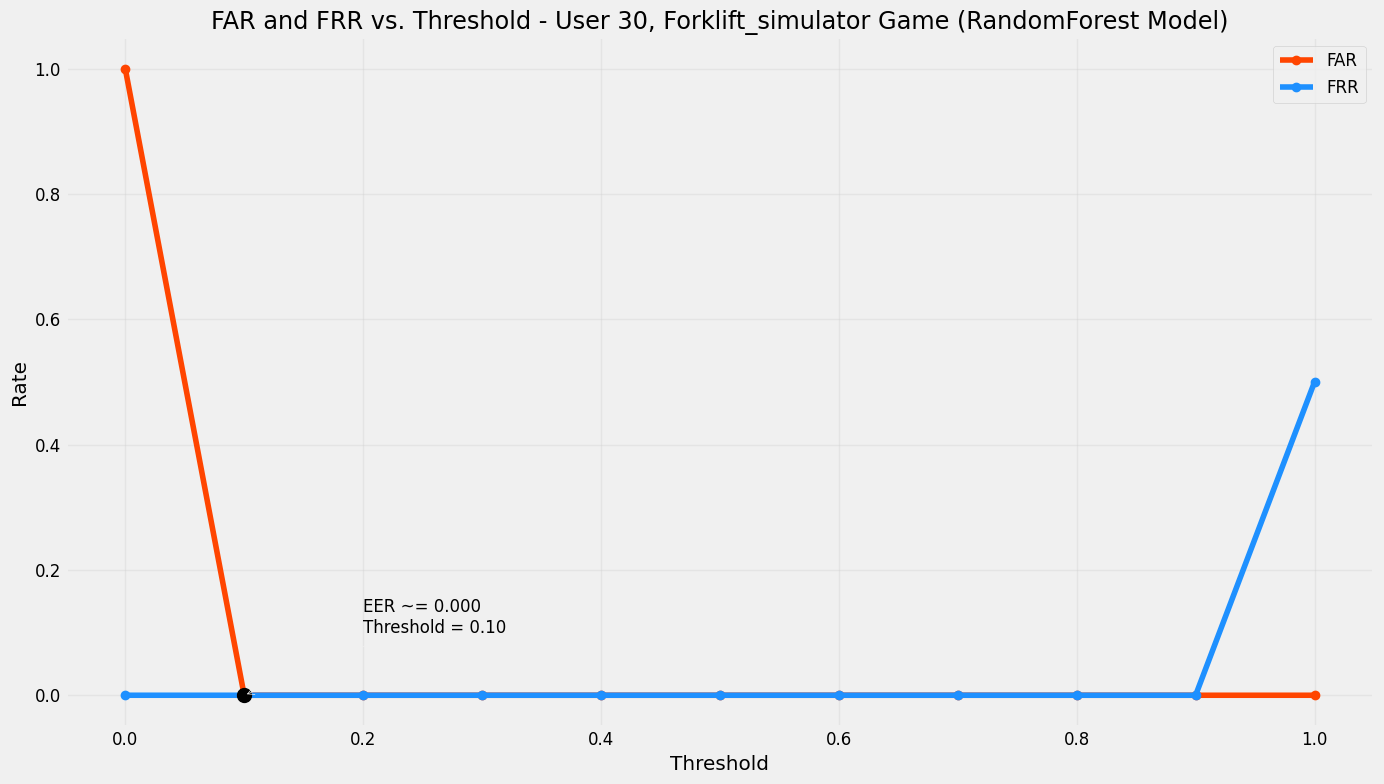

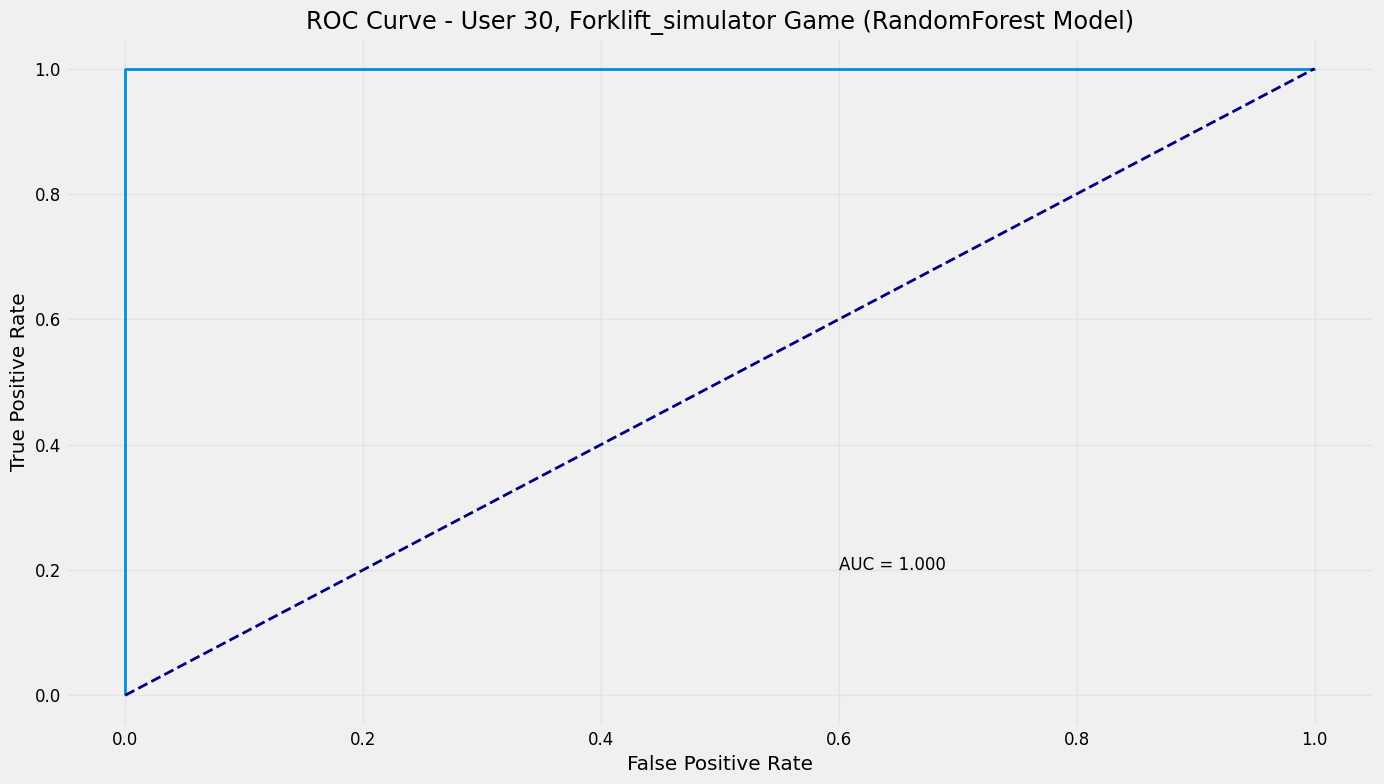

In [16]:
# Analyze authentication thresholds for sample users from each game
sample_forklift_user = authentication_data['forklift_simulator']['user_ids'][0]
print("\nFORKLIFT SIMULATOR THRESHOLD ANALYSIS")
print("====================================")
forklift_threshold_results = authenticator.threshold_analysis(
    user_id=sample_forklift_user, 
    game_type='forklift_simulator', 
    model_name='RandomForest',
    filename = FILENAME,
)


BEAT SABER THRESHOLD ANALYSIS


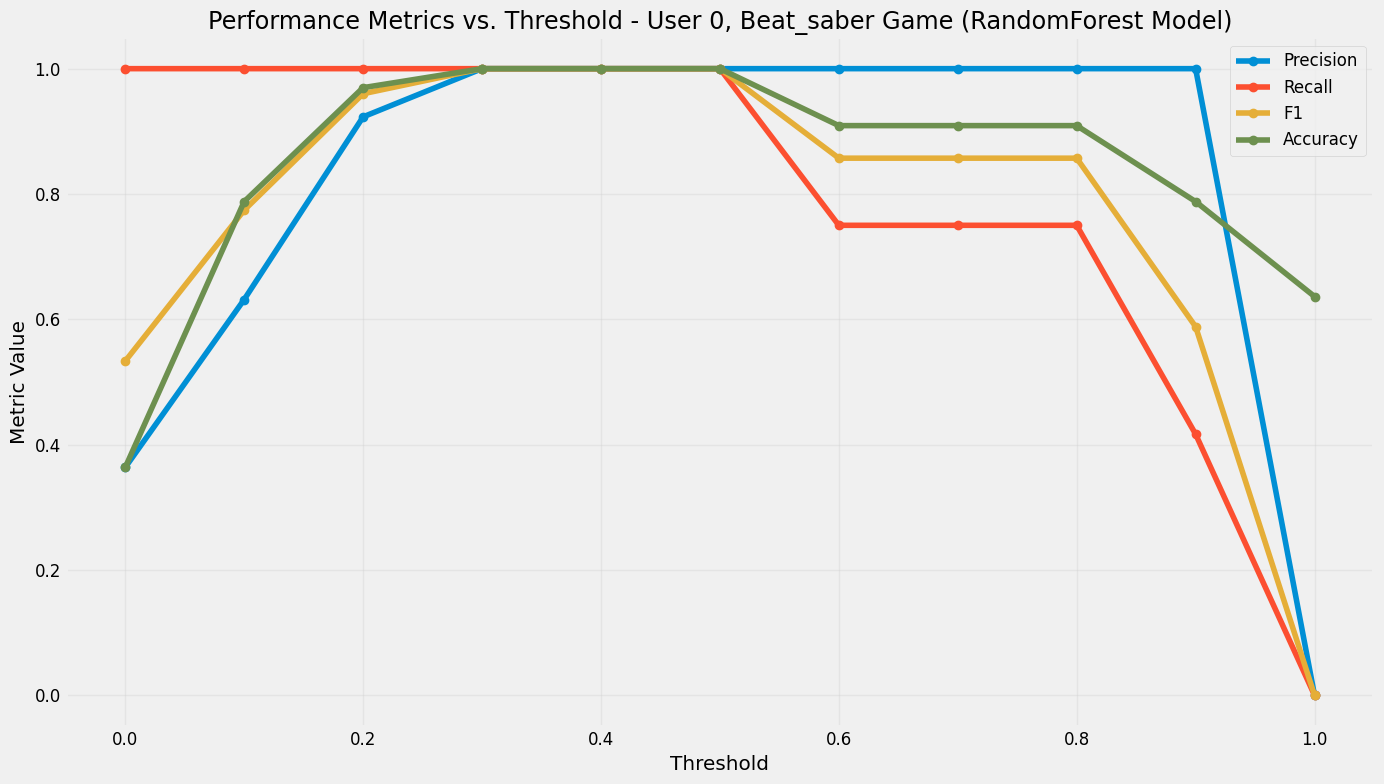

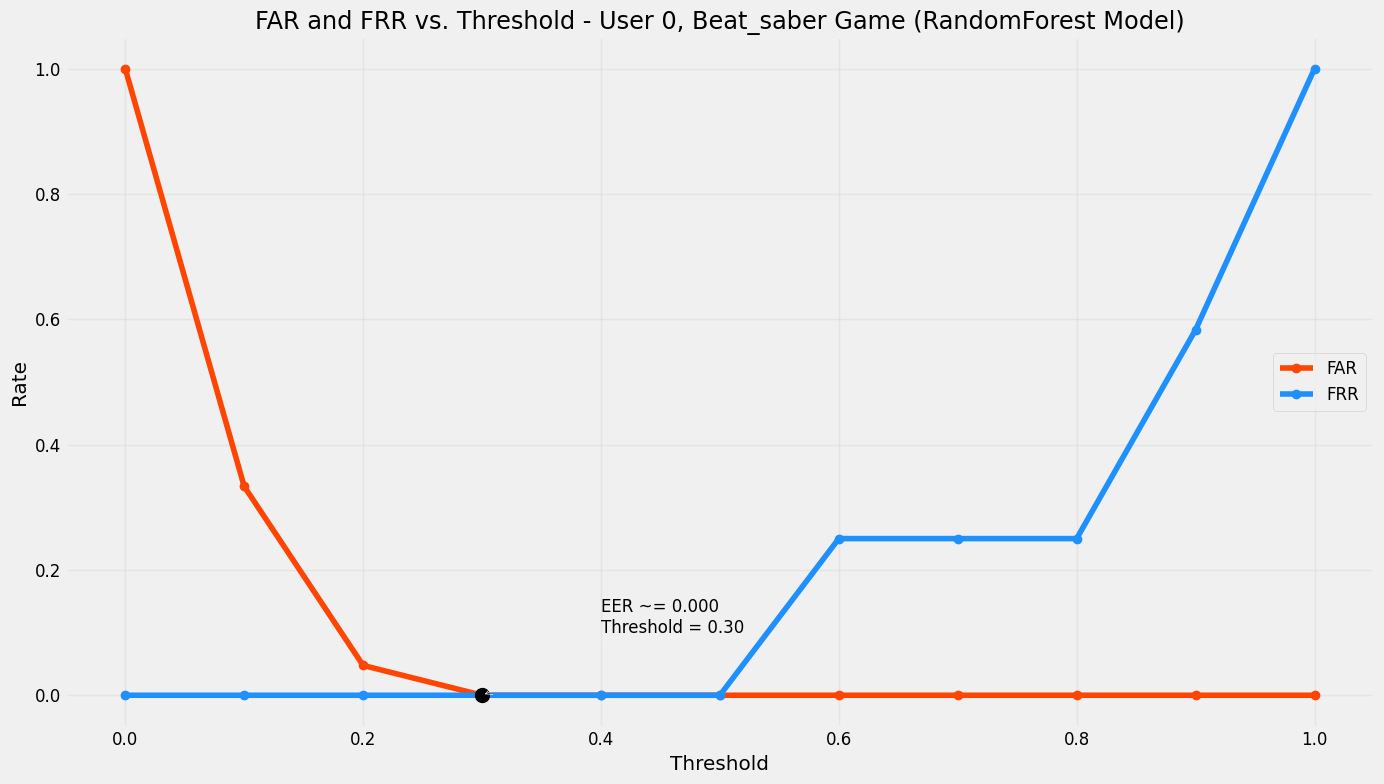

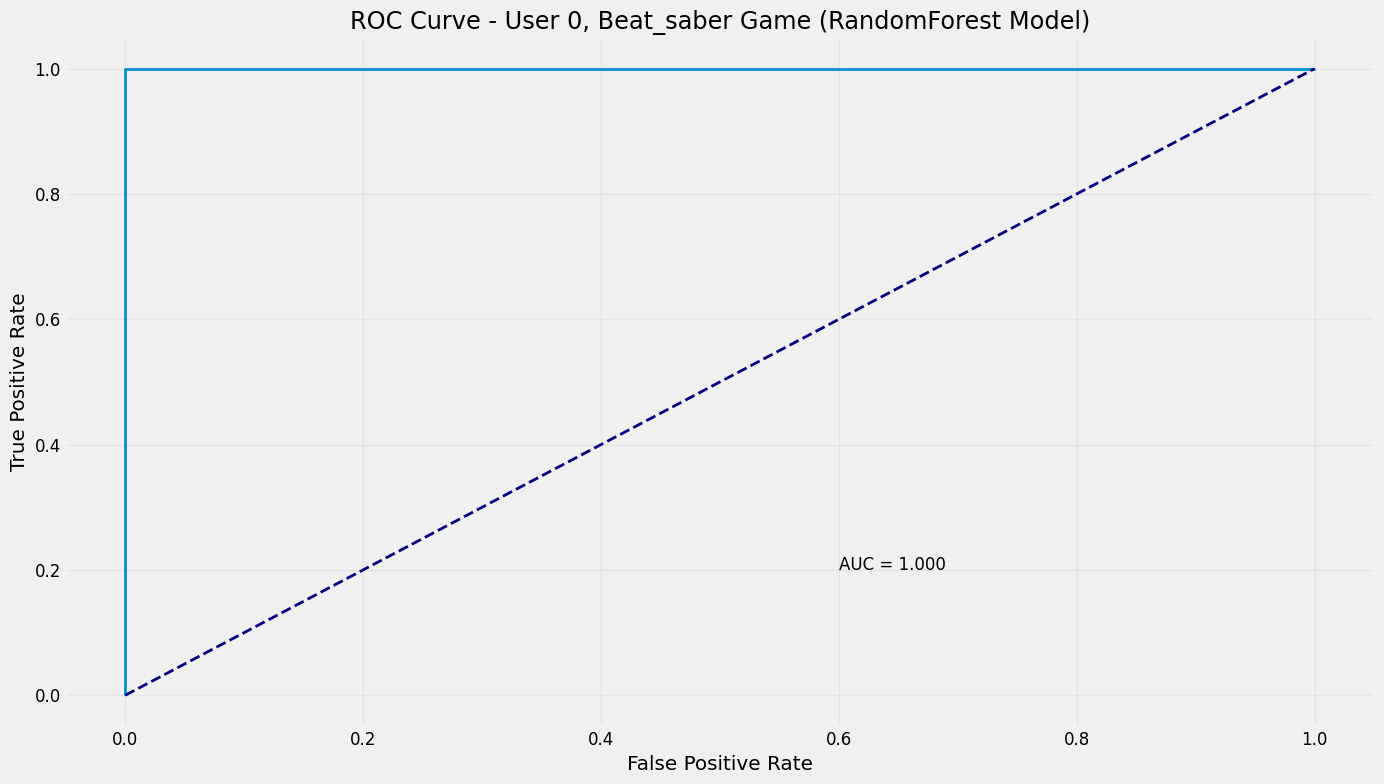

In [17]:
sample_beat_saber_user = authentication_data['beat_saber']['user_ids'][0]
print("\nBEAT SABER THRESHOLD ANALYSIS")
print("============================")
beat_saber_threshold_results = authenticator.threshold_analysis(
    user_id=sample_beat_saber_user, 
    game_type='beat_saber', 
    model_name='RandomForest',
    filename = FILENAME
)